In [1]:
### Gene usage analysis ###
# WT and R on the same tsv sheet

# Quantifying the VDJ gene based on either sequence count or clonotypes.
# options are based on "gene", "allele", "family"
# duplicate count does not work... missing the column. 

# Load required packages
library(alakazam)
library(dplyr)
library(scales)
library(ggplot2)

db <- readChangeoDb("wt_r_NO_igM.tsv", select = NULL, drop = NULL, seq_upper = TRUE)

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
# Quantify usage at the gene level.
# Printing the first 4 genes.
gene <- countGenes(db, groups="sample_id", gene="v_call", mode="gene")
head(gene, n=4)

sample_id,gene,seq_count,seq_freq
<chr>,<chr>,<int>,<dbl>
wt,IGHV1-26,62,0.06066536
wt,IGHV1-82,41,0.04011742
wt,IGHV1-55,38,0.03718200
wt,IGHV1-64,37,0.03620352


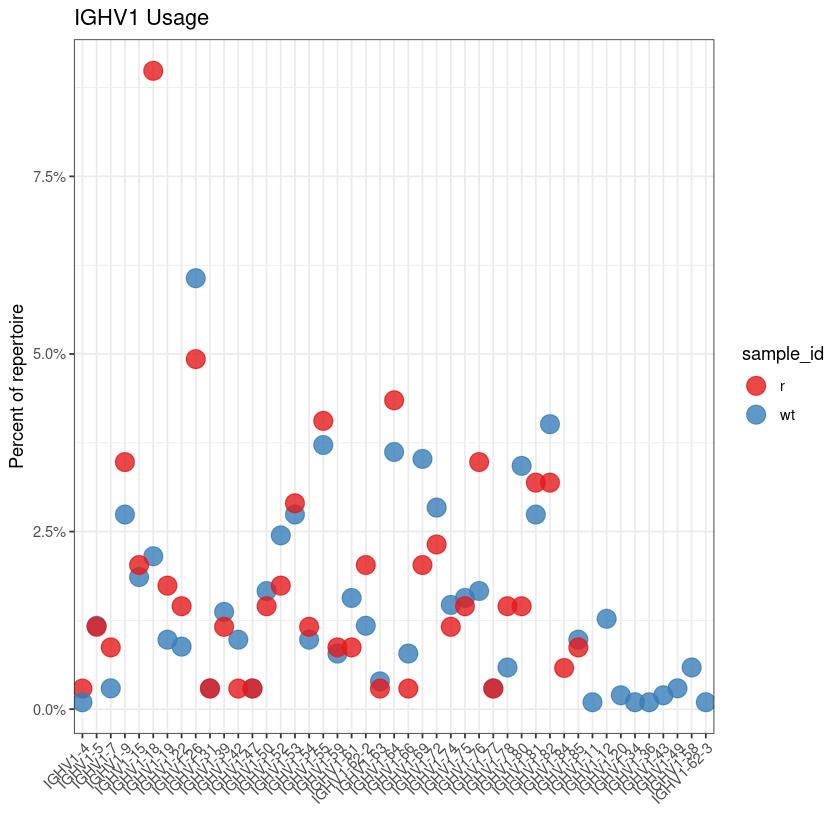

In [5]:
# Assign sorted levels and subset to IGHV1
ighv1 <- gene %>%
    mutate(gene=factor(gene, levels=sortGenes(unique(gene), method="name"))) %>%
    filter(getFamily(gene) == "IGHV1")

# Plot V gene usage in the IGHV1 family by sample
g1 <- ggplot(ighv1, aes(x=gene, y=seq_freq)) +
    theme_bw() +
    ggtitle("IGHV1 Usage") +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_brewer(palette="Set1") +
    geom_point(aes(color=sample_id), size=5, alpha=0.8)
plot(g1)

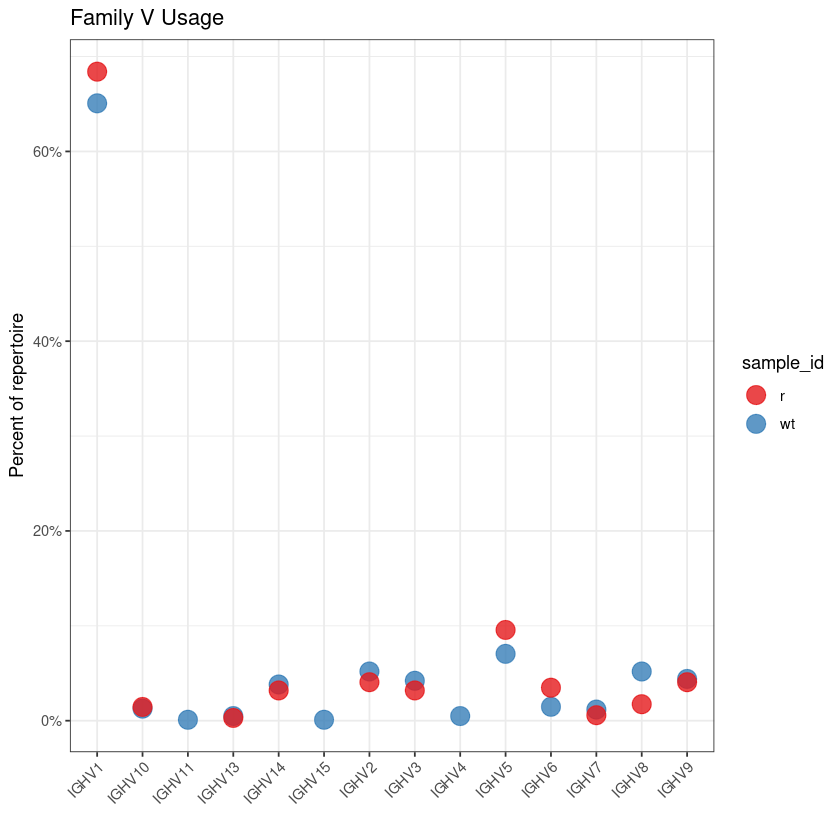

In [6]:
# Quantify V gene based on the family.
family_v <- countGenes(db, gene="v_call", groups="sample_id", mode="family")

# Plot V family usage by sample
g2 <- ggplot(family_v, aes(x=gene, y=seq_freq)) +
    theme_bw() +
    ggtitle("Family V Usage") +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_brewer(palette="Set1") +
    geom_point(aes(color=sample_id), size=5, alpha=0.8)
plot(g2)

In [48]:
# Quantify V family clonal usage by sample and isotype
family <- countGenes(db, gene="v_call", groups=c("sample_id", "c_call"), 
                     clone="clone_id", mode="family")
head(family, n=4)

sample_id,c_call,gene,clone_count,clone_freq
<chr>,<chr>,<chr>,<int>,<dbl>
r,IGHA,IGHV10,1,0.07142857
r,IGHA,IGHV14,1,0.07142857
r,IGHA,IGHV3,1,0.07142857
r,IGHA,IGHV9,1,0.07142857


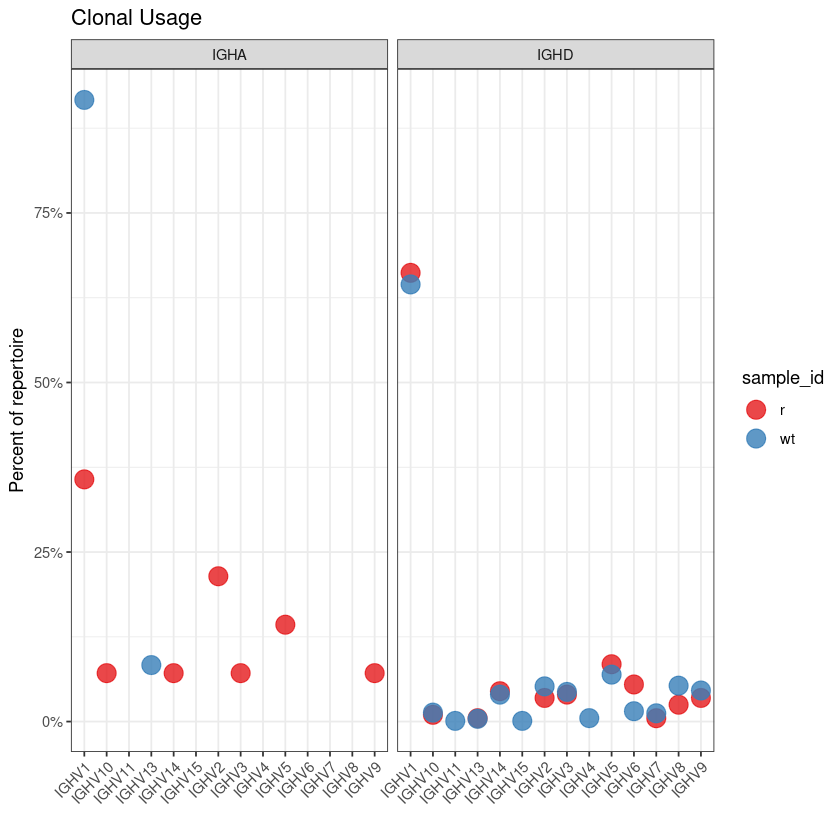

In [49]:
# Subset to IGHM and IGHG for plotting
family <- filter(family, c_call %in% c("IGHG", "IGHD", "IGHA"))
# Plot V family clonal usage by sample and isotype
g3 <- ggplot(family, aes(x=gene, y=clone_freq)) +
    theme_bw() +
    ggtitle("Clonal Usage") +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_brewer(palette="Set1") +
    geom_point(aes(color=sample_id), size=5, alpha=0.8) +
    facet_grid(. ~ c_call)
plot(g3)